## Rompimento da máxima ou mínima do dia anterior 

### Apesar de ser uma estratégia aparentamente lucrativa, é necessário observar gaps, onde não é possível posicionar a ordem exatamente no ponto de rompimento, e analisar também os custos operacionais

In [2]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

C:\Users\juini\anaconda3\envs\py38\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
symbols_list = ['^BVSP', 'BBAS3.SA', 'BBDC4.SA', 'BMGB4.SA', 
                 'BPAC11.SA', 'BRML3.SA', 'ENBR3.SA', 'EVEN3.SA',
                 'ITSA4.SA', 'JHSF3.SA', 'LCAM3.SA', 'MGLU3.SA', 
                'MRFG3.SA', 'OIBR3.SA', 'PETR4.SA', 'PTBL3.SA', 'RENT3.SA', 
                'SLCE3.SA', 'TAEE4.SA', 'USIM5.SA', 'VALE3.SA', 
                'VVAR3.SA', 'WEGE3.SA']


df = web.DataReader(symbols_list[5],start ='2018-1-1',end='2018-12-31',data_source='yahoo')
df['Highshift'] = df['High'].shift(1)
df['Lowshift'] = df['Low'].shift(1)

df.dropna(inplace=True)
df.head()

,High,Low,Open,Close,Volume,Adj Close,Highshift,Lowshift
Date,,,,,,,,
2018-01-03,12.47,12.31,12.38,12.36,4013900.0,11.409657,12.78,12.34
2018-01-04,12.64,12.40,12.41,12.51,7953200.0,11.548123,12.47,12.31
2018-01-05,12.66,12.43,12.59,12.55,3221100.0,11.585049,12.64,12.40
2018-01-08,12.60,12.36,12.55,12.50,3047500.0,11.538891,12.66,12.43
2018-01-09,12.57,12.24,12.50,12.26,3386000.0,11.317346,12.60,12.36


In [5]:

df['Bull'] = np.select([df['High'] > df['Highshift']], [(df['Adj Close'] - df['Highshift'])], default=0)

df['Bear'] = np.select([df['Low'] < df['Lowshift']], [(df['Lowshift'] - df['Adj Close']) ], default=0)

df['ResultCum'] = np.cumsum(df['Bull'] + df['Bear'])
df.head()

,High,Low,Open,Close,Volume,Adj Close,Highshift,Lowshift,Bull,Bear,ResultCum
Date,,,,,,,,,,,
2018-01-03,12.47,12.31,12.38,12.36,4013900.0,11.409657,12.78,12.34,0.000000,0.930344,0.930344
2018-01-04,12.64,12.40,12.41,12.51,7953200.0,11.548123,12.47,12.31,-0.921877,0.000000,0.008467
2018-01-05,12.66,12.43,12.59,12.55,3221100.0,11.585049,12.64,12.40,-1.054952,0.000000,-1.046485
2018-01-08,12.60,12.36,12.55,12.50,3047500.0,11.538891,12.66,12.43,0.000000,0.891109,-0.155375
2018-01-09,12.57,12.24,12.50,12.26,3386000.0,11.317346,12.60,12.36,0.000000,1.042654,0.887279


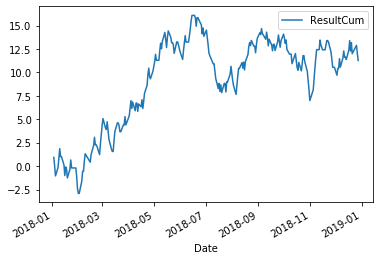

In [7]:
df.plot( y='ResultCum')
plt.show()